In [47]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
#plt.style.use('dark_background')

Data Dictionary:

01 - PatientId Identification of a patient

02 - AppointmentID Identification of each appointment

03 - Gender Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - ScheduledDay The day of the actuall appointment, when they have to visit the doctor.

05 - AppointmentDay The day someone called or registered the appointment, this is before appointment of course.

06 - Age How old is the patient.

07 - Neighbourhood Where the appointment takes place.

08 - Scholarship True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

09 - Hipertension True or False

10 - Diabetes True or False

Alcoholism True or False

Handcap True or False

SMS_received 1 or more messages sent to the patient.

No-show True or False.

In [ ]:
dataset= pd.read_csv("NoShow.csv")

In [ ]:
dataset.head(10)

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
dataset.isna().sum()

In [ ]:
#check if we have any duplicate data
dataset.duplicated().sum()

Scheduleday and appointment day should be in date time format and i think there will be a relationship between the gap between both of them and the No-show relaiton

In [ ]:
dataset["ScheduledDay"]= pd.to_datetime(dataset["ScheduledDay"])
dataset["AppointmentDay"]= pd.to_datetime(dataset["AppointmentDay"])

DataAnalysis
PatientID and appointementID are random numbers for each patient and appointment so it should be dropped or it will lead to misleadings

In [ ]:
dataset.drop(["PatientId","AppointmentID"], axis=1,inplace=True)

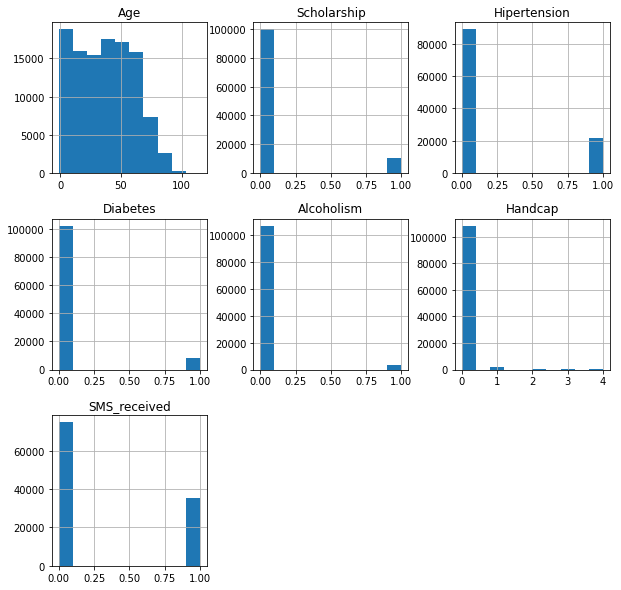

In [9]:
#create histogram for all the columns in one go
p=dataset.hist(figsize=(10,10))

In [10]:
#there are patients less than a year so i want to check if the data is correct cause these patients should not have alcoholism or diabetes

dataset.loc[(dataset['Age']==0) & (dataset['Alcoholism']==1)]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [11]:
# diabetes and found out that some young children could be diagnosed with diabetes at a very early age
dataset.loc[(dataset["Age"]==0) & (dataset["Diabetes"]==1)]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [12]:
dataset.groupby(['No-show'],as_index=False).size().sort_values(by='No-show', ascending=False)

,No-show,size
1,Yes,22319
0,No,88208


In [14]:
#in percentage
dataset['No-show'].value_counts(normalize=True)*100

#About 80% of people have showed up while the other 20% unfortunalty did no

No     79.806744
Yes    20.193256
Name: No-show, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

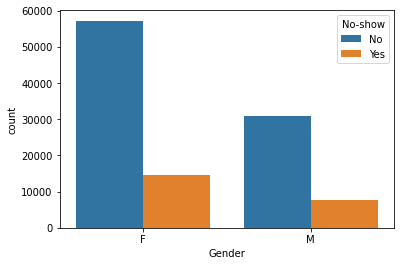

In [15]:
#Lets check Gender first and see if it has a relationship with No-show
sns.countplot(x='Gender',hue='No-show',data=dataset)

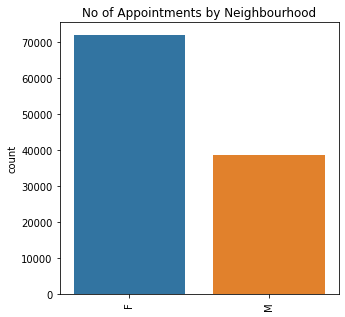

In [16]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(dataset.Gender))
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

In [17]:
#percentage of no. of appointment by gender
dataset.Gender.value_counts(normalize=True)*100

F    64.997693
M    35.002307
Name: Gender, dtype: float64

In [18]:
dataset.groupby(['No-show','Gender'], as_index=False).size()

,No-show,Gender,size
0,No,F,57246
1,No,M,30962
2,Yes,F,14594
3,Yes,M,7725


In [19]:
#Lets check Age now and see the relation ship

dataset[['No-show','Age']].groupby(['No-show'],as_index=False).median()

,No-show,Age
0,No,38
1,Yes,33


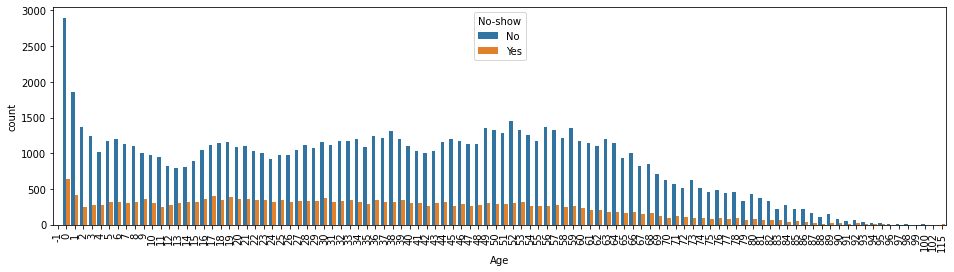

In [20]:
#compute as per all age group
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ab=sns.countplot(x=dataset["Age"],hue=dataset['No-show'])
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()
#age grp less than 3yrs is dominant

In [21]:
#SMS really make a difference?
dataset.SMS_received.value_counts(normalize=True)*100

0    67.897437
1    32.102563
Name: SMS_received, dtype: float64

In [22]:
#Most of patients did not recieve a SMS so let us see the group of people who received a SMS did they attend
dataset.groupby(['No-show','SMS_received'], as_index=False).size()

,No-show,SMS_received,size
0,No,0,62510
1,No,1,25698
2,Yes,0,12535
3,Yes,1,9784


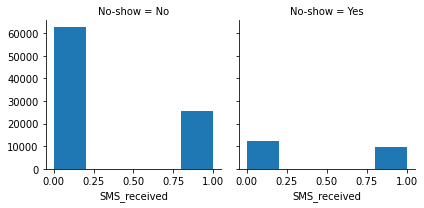

In [23]:
ml=sns.FacetGrid(dataset, col='No-show')
ml.map(plt.hist,'SMS_received',bins=5)

In [24]:
#Now is the time that we check if the neighborhoud make a difference or what?
dataset.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

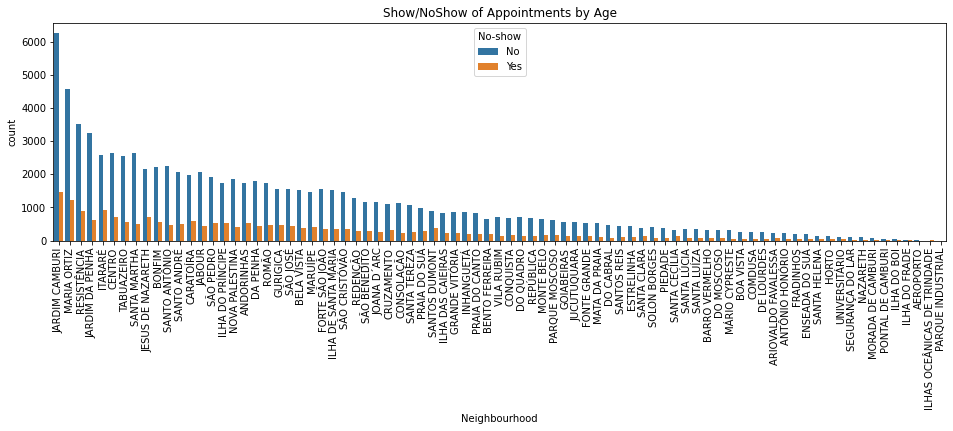

In [29]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=dataset["Neighbourhood"] , hue = dataset["No-show"] , order =dataset["Neighbourhood"].value_counts().index)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

In [32]:
#lets check the data with Diabetes,Hipertension, and alcoholism ,will make any difference?

dataset.Diabetes.value_counts(normalize=True)*100
#only 7% have diabetes

0    92.813521
1     7.186479
Name: Diabetes, dtype: float64

In [34]:
dataset.groupby(['No-show','Diabetes'], as_index=False).size()

,No-show,Diabetes,size
0,No,0,81695
1,No,1,6513
2,Yes,0,20889
3,Yes,1,1430


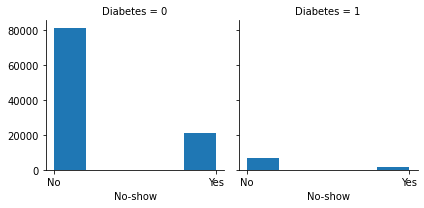

In [35]:
dia = sns.FacetGrid(dataset, col='Diabetes')
dia.map(plt.hist, 'No-show', bins=5)
#those who have diabetes ahve committed to the appointment

In [37]:
#lets check Hipertension?

dataset.Hipertension.value_counts(normalize=True)*100
#19% have hipertension

0    80.275408
1    19.724592
Name: Hipertension, dtype: float64

In [39]:
dataset.groupby(['No-show','Hipertension'], as_index=False).size()

,No-show,Hipertension,size
0,No,0,70179
1,No,1,18029
2,Yes,0,18547
3,Yes,1,3772


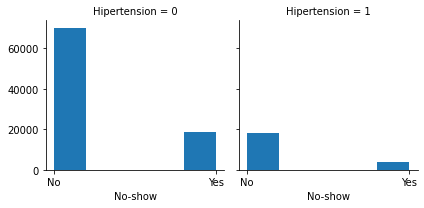

In [40]:
hip = sns.FacetGrid(dataset, col='Hipertension')
hip.map(plt.hist, 'No-show', bins=5)

#only 20% of the samples have hipertension and more than 80% of those 20% are commited to their appoitments

In [ ]:
#lets check Alcoholism

In [41]:
dataset.Alcoholism.value_counts(normalize=True)*100

0    96.960019
1     3.039981
Name: Alcoholism, dtype: float64

In [42]:
dataset.groupby(['No-show','Alcoholism'], as_index=False).size()

,No-show,Alcoholism,size
0,No,0,85525
1,No,1,2683
2,Yes,0,21642
3,Yes,1,677


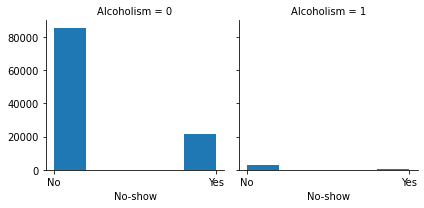

In [44]:
alc= sns.FacetGrid(dataset, col='Alcoholism')
alc.map(plt.hist, 'No-show', bins=5)